In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in CSV
df_Telemedicine = pd.read_csv('./Resources/Telemedicine_Use_in_the_Last_4_Weeks_20240409.csv')
df_tmed_dy21 = pd.read_csv('./Resources/TMED_DY21_public_20220106.csv')
df_tmedtrend = pd.read_csv('./Resources/TMEDTREND_PUBLIC_240306.csv')
df_access = pd.read_csv('./Resources/Access_and_Use_of_Telemedicine_During_COVID-19.csv')

In [3]:
###Telemedicine###

In [4]:
#Print DataFrame
df_Telemedicine.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN


In [5]:
#Convert Date Columns to datetime
df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
    df_Telemedicine["Time Period Start Date"],
    infer_datetime_format =True,
    utc = True
)
df_Telemedicine["Time Period End Date"] = pd.to_datetime(
    df_Telemedicine["Time Period End Date"],
    infer_datetime_format =True,
    utc = True
)

C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\970203181.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\970203181.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period End Date"] = pd.to_datetime(


In [6]:
#Convert Dates to quarters
df_Telemedicine['quarters end period'] = df_Telemedicine["Time Period End Date"].dt.quarter
df_Telemedicine['quarters star period'] = df_Telemedicine["Time Period Start Date"].dt.quarter
Start_End_equal = df_Telemedicine['quarters end period']==df_Telemedicine['quarters star period']
any_false=(~Start_End_equal).any()  
print(any_false)

True


In [7]:
df_Telemedicine_quarters = df_Telemedicine.drop('quarters end period', axis=1).rename(columns={'quarters star period': 'Quarter'}).drop('Time Period End Date', axis=1)
df_Telemedicine_quarters['Time Period Start Date'] = df_Telemedicine_quarters["Time Period Start Date"].dt.year
df_tele_qtr_yr = df_Telemedicine_quarters.rename(columns={'Time Period Start Date': 'Year'})

In [8]:
df_tele_qtr_yr['State'].unique()
df_tele_qtr_yr.loc[df_tele_qtr_yr['State'] == 'United States', 'State'] = 'National'

In [9]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3


In [10]:
df_tele_qtr_yr['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education',
       'By Disability status', 'By State',
       'By Education of adult respondent',
       'By Race/Hispanic ethnicity of adult respondent',
       'By Current US Armed Forces or National Guard service of adult respondent or spouse',
       'By Health insurance of adult respondent',
       'By Total household income', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [11]:
df_tele_qtr_yr_age = df_tele_qtr_yr[df_tele_qtr_yr['Group'] == 'By Age']

In [12]:
df_tele_qtr_yr_age =df_tele_qtr_yr_age.rename(columns={'Subgroup': 'Age'})

In [13]:
df_tele_qtr_yr['State'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
df_tele_qtr_yr_age.dtypes


Indicator               object
Group                   object
State                   object
Age                     object
Phase                  float64
Time Period              int64
Time Period Label       object
Year                     int32
Value                  float64
Low CI                 float64
High CI                float64
Confidence Interval     object
Quartile Range          object
Suppression Flag       float64
Quarter                  int32
dtype: object

In [15]:
df_tele_qtr_yr_age['State'] = df_tele_qtr_yr_age['State'].astype(str)
df_tele_qtr_yr_age['Age'] = df_tele_qtr_yr_age['Age'].astype(str)
df_tele_qtr_yr_age['Year '] = df_tele_qtr_yr_age['Year'].astype(str)
df_tele_qtr_yr_age['Quarter'] = df_tele_qtr_yr_age['Quarter'].astype(str)

In [16]:
df_tele_qtr_yr_age.dtypes


Indicator               object
Group                   object
State                   object
Age                     object
Phase                  float64
Time Period              int64
Time Period Label       object
Year                     int32
Value                  float64
Low CI                 float64
High CI                float64
Confidence Interval     object
Quartile Range          object
Suppression Flag       float64
Quarter                 object
Year                    object
dtype: object

In [17]:
###TMED_DY21###

In [18]:
df_tmed_dy21

,Time_Frame,TM_Srvc_Type,Time_Frame_Yr,Time_Frame_Mth,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,TM_Bene_Cnt,Tot_Bene_Cnt,TM_Bene_Pct
0,Pandemic (March 2020-February 2021),All Telemedicine,2020,03,Alabama,All,All,All,Aged,All,All,26682.0,331535.0,0.080480
1,Pandemic (March 2020-February 2021),All Telemedicine,2020,03,Alabama,All,All,All,All,65-74,All,14398.0,177040.0,0.081326
2,Pandemic (March 2020-February 2021),All Telemedicine,2020,03,Alabama,All,All,All,All,75-84,All,9391.0,116905.0,0.080330
3,Pandemic (March 2020-February 2021),All Telemedicine,2020,03,Alabama,All,All,All,All,85 and over,All,3255.0,42856.0,0.075952
4,Pandemic (March 2020-February 2021),All Telemedicine,2020,03,Alabama,All,All,All,All,All,All,36027.0,428008.0,0.084174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15728,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,11,National,All,All,All,All,All,All,1822.0,27232089.0,0.000067
15729,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,12,National,All,All,All,All,All,All,2080.0,27051200.0,0.000077
15730,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2020,01,National,All,All,All,All,All,All,1936.0,22684003.0,0.000085
15731,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2020,02,National,All,All,All,All,All,All,2621.0,24484825.0,0.000107


In [19]:
df_tmed_dy21.dtypes

Time_Frame                   object
TM_Srvc_Type                 object
Time_Frame_Yr                object
Time_Frame_Mth               object
Bene_Geo_Desc                object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Bene_Age_Desc                object
Bene_RUCA_Desc               object
TM_Bene_Cnt                 float64
Tot_Bene_Cnt                float64
TM_Bene_Pct                 float64
dtype: object

In [20]:
# Mapping from month numbers to quarters
month_to_quarter = {
    '01': '1', '02': '1', '03': '1',
    '04': '2', '05': '2', '06': '2',
    '07': '3', '08': '3', '09': '3',
    '10': '4', '11': '4', '12': '4'
}


# Convert Month to Quarter
df_tmed_dy21['Time_Frame_Mth'] = df_tmed_dy21['Time_Frame_Mth'].replace(month_to_quarter)

#Verified it converted
df_tmed_dy21['Time_Frame_Mth'].unique()

#Rename Column
df_tmed_dy21=df_tmed_dy21.rename(columns={'Time_Frame_Mth': 'Quarter'})



In [21]:
df_tmed_dy21

,Time_Frame,TM_Srvc_Type,Time_Frame_Yr,Quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,TM_Bene_Cnt,Tot_Bene_Cnt,TM_Bene_Pct
0,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,Aged,All,All,26682.0,331535.0,0.080480
1,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,65-74,All,14398.0,177040.0,0.081326
2,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,75-84,All,9391.0,116905.0,0.080330
3,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,85 and over,All,3255.0,42856.0,0.075952
4,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,All,All,36027.0,428008.0,0.084174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15728,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,1822.0,27232089.0,0.000067
15729,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,2080.0,27051200.0,0.000077
15730,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2020,1,National,All,All,All,All,All,All,1936.0,22684003.0,0.000085
15731,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2020,1,National,All,All,All,All,All,All,2621.0,24484825.0,0.000107


In [22]:
#Check how many values equal "Entire Period"
overall_count_qrt = df_tmed_dy21['Quarter'].value_counts().get('Entire Period', 0)
print(overall_count_qrt)

#Filer out 'Entire Period'
filtered_qtr_tmed_dy21 = df_tmed_dy21.query("Quarter != 'Entire Period'")

1211


In [29]:
#Rename Columns
filtered_qtr_tmed_dy21 =df_tmed_dy21.rename(columns={'Bene_Geo_Desc': 'State'})
filtered_qtr_tmed_dy21 =df_tmed_dy21.rename(columns={'Bene_Age_Desc': 'Age'})
df_tmed_dy21=df_tmed_dy21.rename(columns={'Time_Frame_Yr': 'Year'}).rename(columns={'Bene_Geo_Desc': 'State'}).rename(columns={'Bene_Age_Desc':'Age'})


In [30]:
filtered_qtr_tmed_dy21['Age'].unique()

array(['All', '65-74', '75-84', '85 and over', 'Less than 65'],
      dtype=object)

In [31]:
filtered_qtr_age_tmed_dy21 = filtered_qtr_tmed_dy21[filtered_qtr_tmed_dy21['Age'] != 'All']

In [32]:
filtered_qtr_age_tmed_dy21['Age'].unique()

array(['65-74', '75-84', '85 and over', 'Less than 65'], dtype=object)

In [33]:
filtered_qtr_age_tmed_dy21

,Time_Frame,TM_Srvc_Type,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,TM_Bene_Cnt,Tot_Bene_Cnt,TM_Bene_Pct
1,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,65-74,All,14398.0,177040.0,0.081326
2,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,75-84,All,9391.0,116905.0,0.080330
3,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,85 and over,All,3255.0,42856.0,0.075952
8,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,Less than 65,All,8983.0,91207.0,0.098490
22,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alaska,All,All,All,All,65-74,All,1763.0,12407.0,0.142097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15618,Pandemic (March 2020-February 2021),All Telemedicine,Entire Period,Entire Period,Wisconsin,All,All,All,All,Less than 65,All,75031.0,126721.0,0.592096
15632,Pandemic (March 2020-February 2021),All Telemedicine,Entire Period,Entire Period,Wyoming,All,All,All,All,65-74,All,13396.0,44937.0,0.298106
15633,Pandemic (March 2020-February 2021),All Telemedicine,Entire Period,Entire Period,Wyoming,All,All,All,All,75-84,All,8361.0,25620.0,0.326347
15634,Pandemic (March 2020-February 2021),All Telemedicine,Entire Period,Entire Period,Wyoming,All,All,All,All,85 and over,All,3535.0,9967.0,0.354670


In [34]:
#Unique Values for Year
filtered_qtr_age_tmed_dy21['Year'].unique()

array(['2020', '2021', 'Entire Period'], dtype=object)

In [35]:
#Get value count for values in year column
filtered_qtr_age_tmed_dy21 = filtered_qtr_age_tmed_dy21['Year'].value_counts().get('Entire Period', 0)
print(filtered_qtr_age_tmed_dy21)

240


In [36]:
filtered_qtr_age_tmed_dy21 = filtered_qtr_tmed_dy21[filtered_qtr_tmed_dy21['Year'] != 'Entire Period']

In [37]:
filtered_qtr_age_tmed_dy21['Year'].unique()

array(['2020', '2021', '2019'], dtype=object)

In [38]:
#Unique Values for Year
filtered_qtr_age_tmed_dy21['Quarter'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [39]:
filtered_qtr_age_tmed_dy21['State'] = filtered_qtr_age_tmed_dy21['State'].astype(str)
filtered_qtr_age_tmed_dy21['Age'] = filtered_qtr_age_tmed_dy21['Age'].astype(str)
filtered_qtr_age_tmed_dy21['Year'] = filtered_qtr_age_tmed_dy21['Year'].astype(str)
filtered_qtr_age_tmed_dy21['Quarter'] = filtered_qtr_age_tmed_dy21['Quarter'].astype(str)

C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\3639542496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_qtr_age_tmed_dy21['State'] = filtered_qtr_age_tmed_dy21['State'].astype(str)
C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\3639542496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_qtr_age_tmed_dy21['Age'] = filtered_qtr_age_tmed_dy21['Age'].astype(str)
C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\3639542496.py:3: SettingWithCopyWarning: 

In [40]:
filtered_qtr_age_tmed_dy21

,Time_Frame,TM_Srvc_Type,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,TM_Bene_Cnt,Tot_Bene_Cnt,TM_Bene_Pct
0,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,Aged,All,All,26682.0,331535.0,0.080480
1,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,65-74,All,14398.0,177040.0,0.081326
2,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,75-84,All,9391.0,116905.0,0.080330
3,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,85 and over,All,3255.0,42856.0,0.075952
4,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,All,All,36027.0,428008.0,0.084174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15727,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,1712.0,29613035.0,0.000058
15728,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,1822.0,27232089.0,0.000067
15729,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,2080.0,27051200.0,0.000077
15730,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2020,1,National,All,All,All,All,All,All,1936.0,22684003.0,0.000085


In [41]:
filtered_qtr_age_tmed_dy21.dtypes

Time_Frame                   object
TM_Srvc_Type                 object
Year                         object
Quarter                      object
State                        object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Age                          object
Bene_RUCA_Desc               object
TM_Bene_Cnt                 float64
Tot_Bene_Cnt                float64
TM_Bene_Pct                 float64
dtype: object

In [42]:
###TMEDTREND###

In [43]:
#Print Data Frame
df_tmedtrend

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21667,2023,3,Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
21668,2023,3,Washington,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
21669,2023,3,West Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
21670,2023,3,Wisconsin,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN


In [44]:
#Check Types
df_tmedtrend.dtypes

Year                          int64
quarter                      object
Bene_Geo_Desc                object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Bene_Age_Desc                object
Bene_RUCA_Desc               object
Total_Bene_TH_Elig          float64
Total_PartB_Enrl            float64
Total_Bene_Telehealth       float64
Pct_Telehealth              float64
dtype: object

In [45]:
#Check Unique Values in Quarters Column
df_tmedtrend['quarter'].unique()

#Check value count of Overall
overall_count = df_tmedtrend['quarter'].value_counts().get('Overall', 0)
print(overall_count)

#Filter out Overall
filtered_qtr_tmedtrend = df_tmedtrend.query("quarter != 'Overall'")

3612


In [46]:
#Rename Columns
filtered_qtr_tmedtrend=filtered_qtr_tmedtrend.rename(columns={'Bene_Geo_Desc': 'State'}).rename(columns={'quarter': 'Quarter'}).rename(columns={'Bene_Age_Desc': 'Age'})

In [47]:
#Check unique values in Age column
filtered_qtr_tmedtrend['Age'].unique()

array(['All', '0-64', '65-74', '75-84', '85 and over'], dtype=object)

In [48]:
#Filter out All
filtered_qtr_age_tmedtrend = filtered_qtr_tmedtrend[filtered_qtr_tmedtrend['Age'] != 'All']

filtered_qtr_age_tmedtrend['Age'].unique()

array(['0-64', '65-74', '75-84', '85 and over'], dtype=object)

In [49]:
filtered_qtr_age_tmedtrend

,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
1270,2020,1,National,All,All,All,All,0-64,All,3163071.0,4.301853e+06,365839.0,0.1157
1271,2020,1,National,Medicare & Medicaid,All,All,All,0-64,All,2012704.0,2.571352e+06,251094.0,0.1248
1272,2020,1,National,Medicare Only,All,All,All,0-64,All,1150367.0,1.730500e+06,114745.0,0.0997
1273,2020,1,National,All,American Indian/Alaska Native,All,All,0-64,All,37085.0,4.961333e+04,3493.0,0.0942
1274,2020,1,National,All,Asian/Pacific Islander,All,All,0-64,All,58292.0,8.433633e+04,6026.0,0.1034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,2023,3,Wisconsin,All,All,All,All,85 and over,All,41593.0,5.168267e+04,2529.0,0.0608
21513,2023,3,Wyoming,All,All,All,All,0-64,All,5754.0,8.414667e+03,959.0,0.1667
21514,2023,3,Wyoming,All,All,All,All,65-74,All,33249.0,5.183133e+04,1750.0,0.0526
21515,2023,3,Wyoming,All,All,All,All,75-84,All,21050.0,2.849067e+04,1042.0,0.0495


In [50]:
filtered_qtr_age_tmedtrend.dtypes


Year                          int64
Quarter                      object
State                        object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Age                          object
Bene_RUCA_Desc               object
Total_Bene_TH_Elig          float64
Total_PartB_Enrl            float64
Total_Bene_Telehealth       float64
Pct_Telehealth              float64
dtype: object

In [51]:
filtered_qtr_age_tmedtrend['State'] = filtered_qtr_age_tmedtrend['State'].astype(str)
filtered_qtr_age_tmedtrend['Age'] = filtered_qtr_age_tmedtrend['Age'].astype(str)
filtered_qtr_age_tmedtrend['Year '] = filtered_qtr_age_tmedtrend['Year'].astype(str)
filtered_qtr_age_tmedtrend['Quarter'] = filtered_qtr_age_tmedtrend['Quarter'].astype(str)

C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\1119921062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_qtr_age_tmedtrend['State'] = filtered_qtr_age_tmedtrend['State'].astype(str)
C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\1119921062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_qtr_age_tmedtrend['Age'] = filtered_qtr_age_tmedtrend['Age'].astype(str)
C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\1119921062.py:3: SettingWithCopyWarning: 

In [52]:
filtered_qtr_age_tmedtrend.dtypes


Year                          int64
Quarter                      object
State                        object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Age                          object
Bene_RUCA_Desc               object
Total_Bene_TH_Elig          float64
Total_PartB_Enrl            float64
Total_Bene_Telehealth       float64
Pct_Telehealth              float64
Year                         object
dtype: object

In [53]:
filtered_qtr_age_tmedtrend

,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth,Year
1270,2020,1,National,All,All,All,All,0-64,All,3163071.0,4.301853e+06,365839.0,0.1157,2020
1271,2020,1,National,Medicare & Medicaid,All,All,All,0-64,All,2012704.0,2.571352e+06,251094.0,0.1248,2020
1272,2020,1,National,Medicare Only,All,All,All,0-64,All,1150367.0,1.730500e+06,114745.0,0.0997,2020
1273,2020,1,National,All,American Indian/Alaska Native,All,All,0-64,All,37085.0,4.961333e+04,3493.0,0.0942,2020
1274,2020,1,National,All,Asian/Pacific Islander,All,All,0-64,All,58292.0,8.433633e+04,6026.0,0.1034,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,2023,3,Wisconsin,All,All,All,All,85 and over,All,41593.0,5.168267e+04,2529.0,0.0608,2023
21513,2023,3,Wyoming,All,All,All,All,0-64,All,5754.0,8.414667e+03,959.0,0.1667,2023
21514,2023,3,Wyoming,All,All,All,All,65-74,All,33249.0,5.183133e+04,1750.0,0.0526,2023
21515,2023,3,Wyoming,All,All,All,All,75-84,All,21050.0,2.849067e+04,1042.0,0.0495,2023


In [54]:
filtered_qtr_age_tmedtrend

,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth,Year
1270,2020,1,National,All,All,All,All,0-64,All,3163071.0,4.301853e+06,365839.0,0.1157,2020
1271,2020,1,National,Medicare & Medicaid,All,All,All,0-64,All,2012704.0,2.571352e+06,251094.0,0.1248,2020
1272,2020,1,National,Medicare Only,All,All,All,0-64,All,1150367.0,1.730500e+06,114745.0,0.0997,2020
1273,2020,1,National,All,American Indian/Alaska Native,All,All,0-64,All,37085.0,4.961333e+04,3493.0,0.0942,2020
1274,2020,1,National,All,Asian/Pacific Islander,All,All,0-64,All,58292.0,8.433633e+04,6026.0,0.1034,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,2023,3,Wisconsin,All,All,All,All,85 and over,All,41593.0,5.168267e+04,2529.0,0.0608,2023
21513,2023,3,Wyoming,All,All,All,All,0-64,All,5754.0,8.414667e+03,959.0,0.1667,2023
21514,2023,3,Wyoming,All,All,All,All,65-74,All,33249.0,5.183133e+04,1750.0,0.0526,2023
21515,2023,3,Wyoming,All,All,All,All,75-84,All,21050.0,2.849067e+04,1042.0,0.0495,2023


In [55]:
# Sample data with months as integers
data = {'Time_Frame_Mth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] * 5}
df = pd.DataFrame(data)

# Check if 'Time_Frame_Mth' is in the DataFrame
if 'Time_Frame_Mth' in df.columns:
    print("Column 'Time_Frame_Mth' exists in the DataFrame.")
else:
    print("Column 'Time_Frame_Mth' does not exist in the DataFrame.")

# Define a function to map month to quarter
def map_to_quarter(month):
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    elif 10 <= month <= 12:
        return 'Q4'
    else:
        return None

# Apply the function to create the quarter column
df['quarter'] = df['Time_Frame_Mth'].apply(map_to_quarter)


# Display the DataFrame with the new column
with pd.option_context('display.max_rows', None):
    print(df)

Column 'Time_Frame_Mth' exists in the DataFrame.
    Time_Frame_Mth quarter
0                1      Q1
1                2      Q1
2                3      Q1
3                4      Q2
4                5      Q2
5                6      Q2
6                7      Q3
7                8      Q3
8                9      Q3
9               10      Q4
10              11      Q4
11              12      Q4
12               1      Q1
13               2      Q1
14               3      Q1
15               4      Q2
16               5      Q2
17               6      Q2
18               7      Q3
19               8      Q3
20               9      Q3
21              10      Q4
22              11      Q4
23              12      Q4
24               1      Q1
25               2      Q1
26               3      Q1
27               4      Q2
28               5      Q2
29               6      Q2
30               7      Q3
31               8      Q3
32               9      Q3
33              10      Q4
34    

In [56]:
# Load the data
print(df_access['Group'].unique())

['Total' 'Age group' 'Race/Hispanic origin' 'Sex' 'Education'
 'Urbanization' 'Chronic conditions']


In [57]:
print(df_access.columns)

Index(['Round', 'Indicator', 'Group', 'Subgroup', 'Sample Size', 'Response',
       'Percent', 'Standard Error', 'Suppression', 'Significant 1',
       'Significant 2'],
      dtype='object')


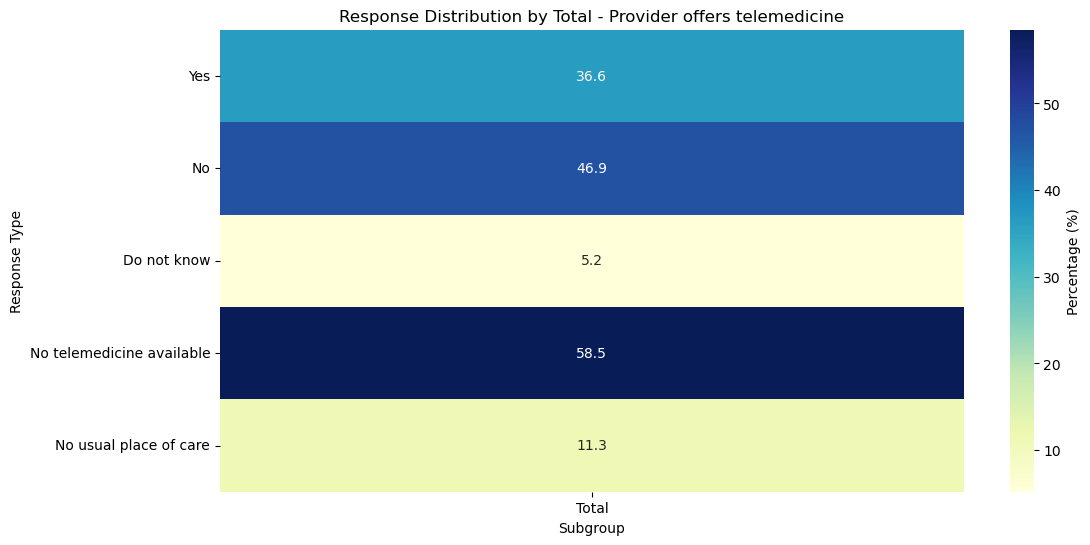

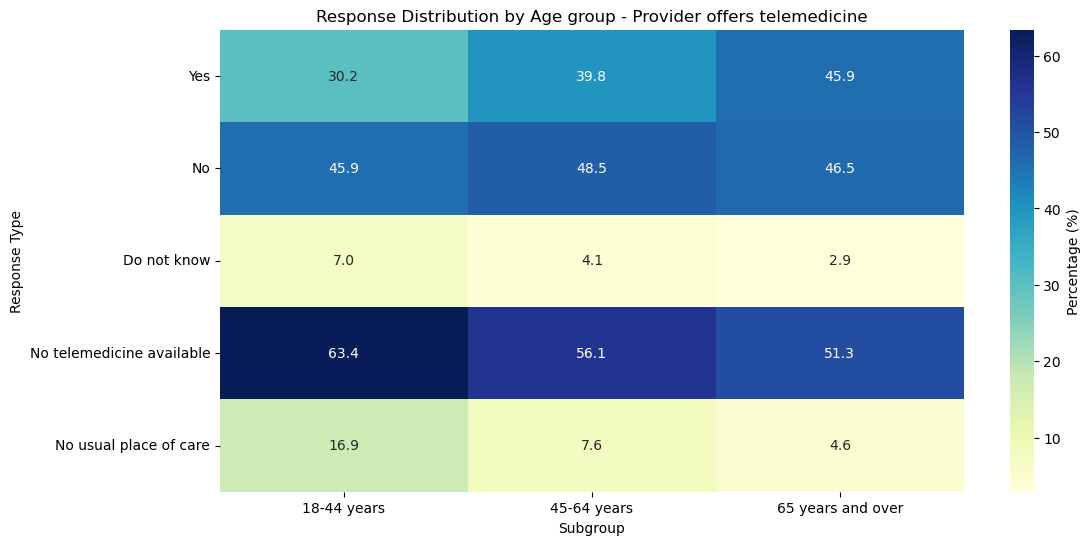

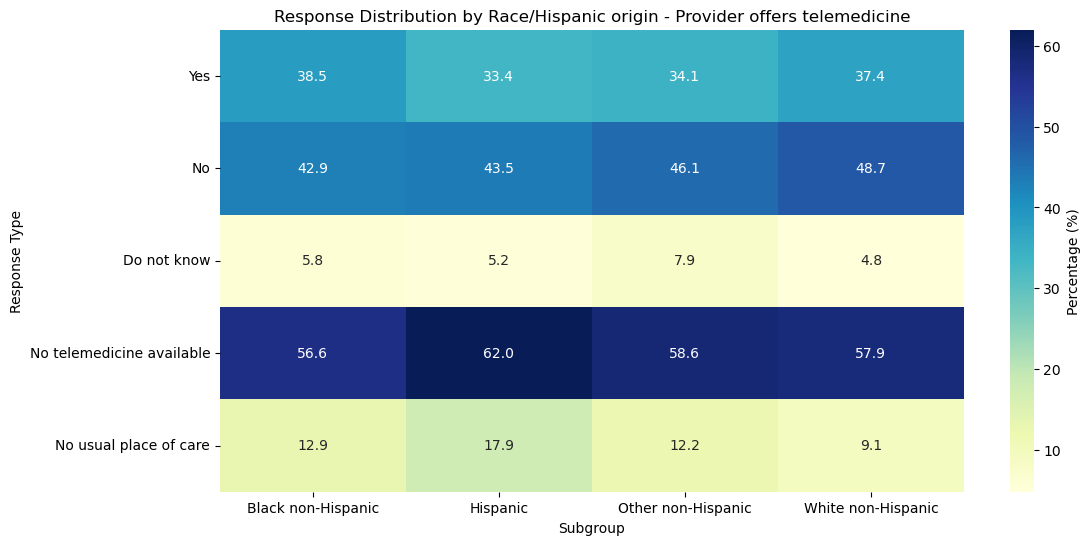

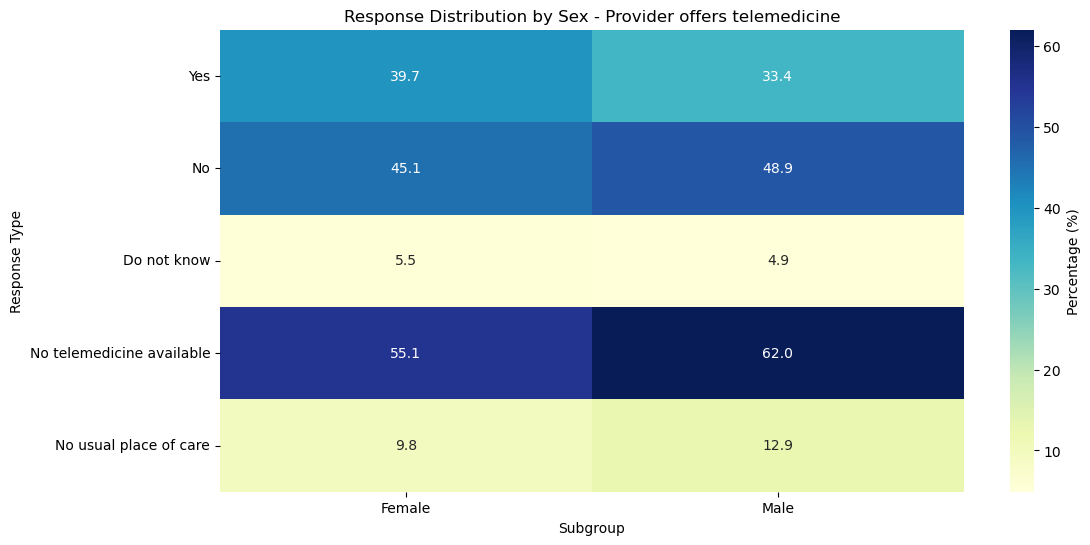

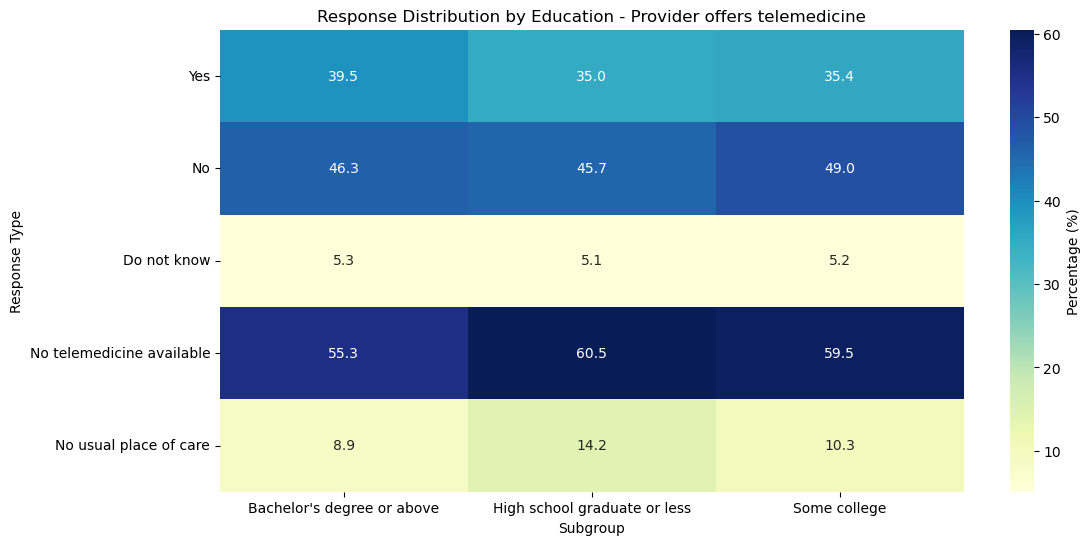

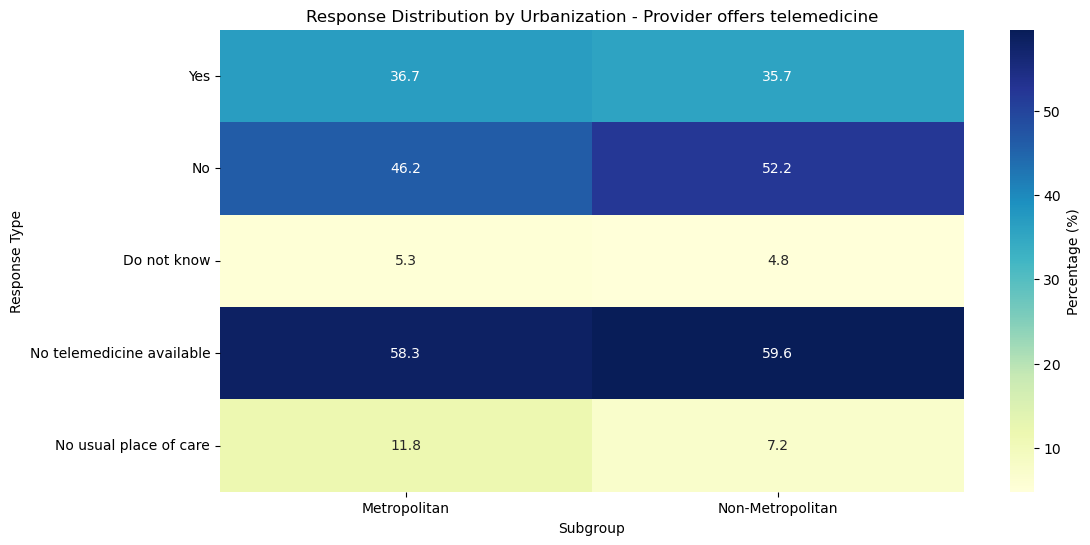

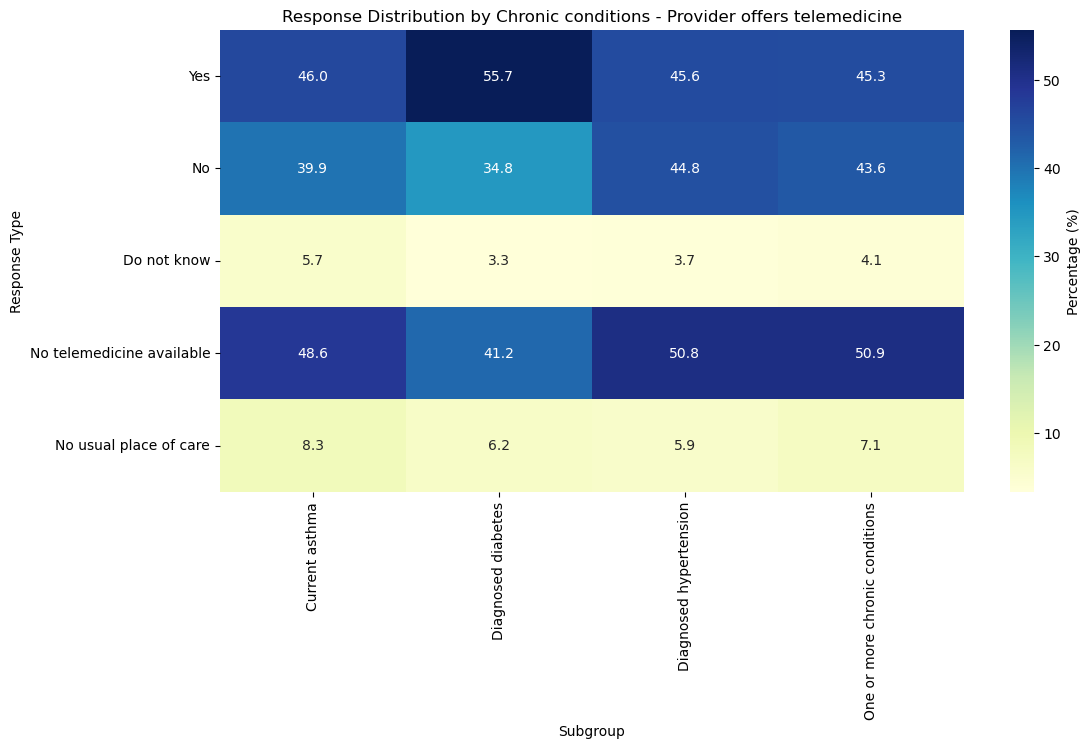

In [58]:
categories = ['Total', 'Age group', 'Race/Hispanic origin', 'Sex', 'Education', 'Urbanization', 'Chronic conditions']

# Define a default response order
default_response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']

def plot_data_for_category(category):
    # Filter data for the category
    category_data = df_access[df_access['Group'] == category]
    
    if 'Indicator' in category_data.columns:
        indicator = category_data['Indicator'].iloc[0]
    else:
        indicator = "No Indicator Available"

    # Create a pivot table
    category_pivot = category_data.pivot_table(index='Response', columns='Subgroup', values='Percent', aggfunc='first')
    
    # Remove 'Total' from the DataFrame if it exists
    category_pivot = category_pivot.drop('Total', errors='ignore')
    
    # Reindex the pivot table according to the specified order.
    if category == 'Chronic conditions':
        response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']
    else:
        response_order = default_response_order
    category_pivot = category_pivot.reindex(response_order)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.heatmap(category_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
    plt.title(f'Response Distribution by {category} - {indicator}')
    plt.ylabel('Response Type')
    plt.xlabel('Subgroup')
    plt.show()

# Generate plots for each category
for category in categories:
    plot_data_for_category(category)

c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


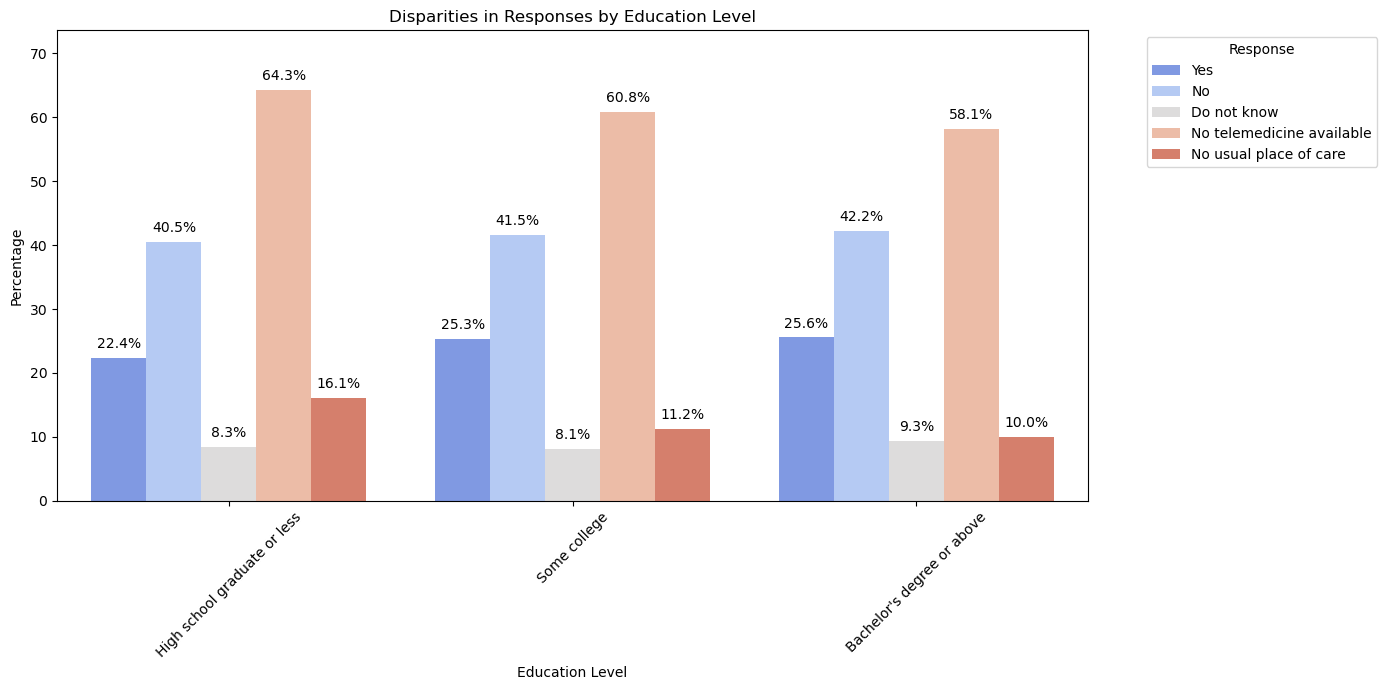

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure pandas is imported

def plot_education_disparities():
    # Filter data for the 'Education' category
    education_data = df_access[df_access['Group'] == 'Education']
    
    # Exclude 'Total' from both the responses and subgroups if necessary
    education_data = education_data[education_data['Subgroup'] != 'Total']

    # Define the desired response order
    response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']

    # Ensure the response order in data
    education_data['Response'] = pd.Categorical(education_data['Response'], categories=response_order, ordered=True)

    # Create a pivot table
    education_pivot = education_data.pivot_table(index='Subgroup', columns='Response', values='Percent', aggfunc='first')
    
    # Plotting
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=education_data, x='Subgroup', y='Percent', hue='Response', palette='coolwarm', 
                     order=education_data['Subgroup'].unique(), hue_order=response_order,
                     edgecolor='none', linewidth=0, errcolor='none')  # Explicitly setting errcolor

    plt.title('Disparities in Responses by Education Level')
    plt.ylabel('Percentage')
    plt.xlabel('Education Level')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Adding annotations to each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Call the function to plot disparities in education
plot_education_disparities()

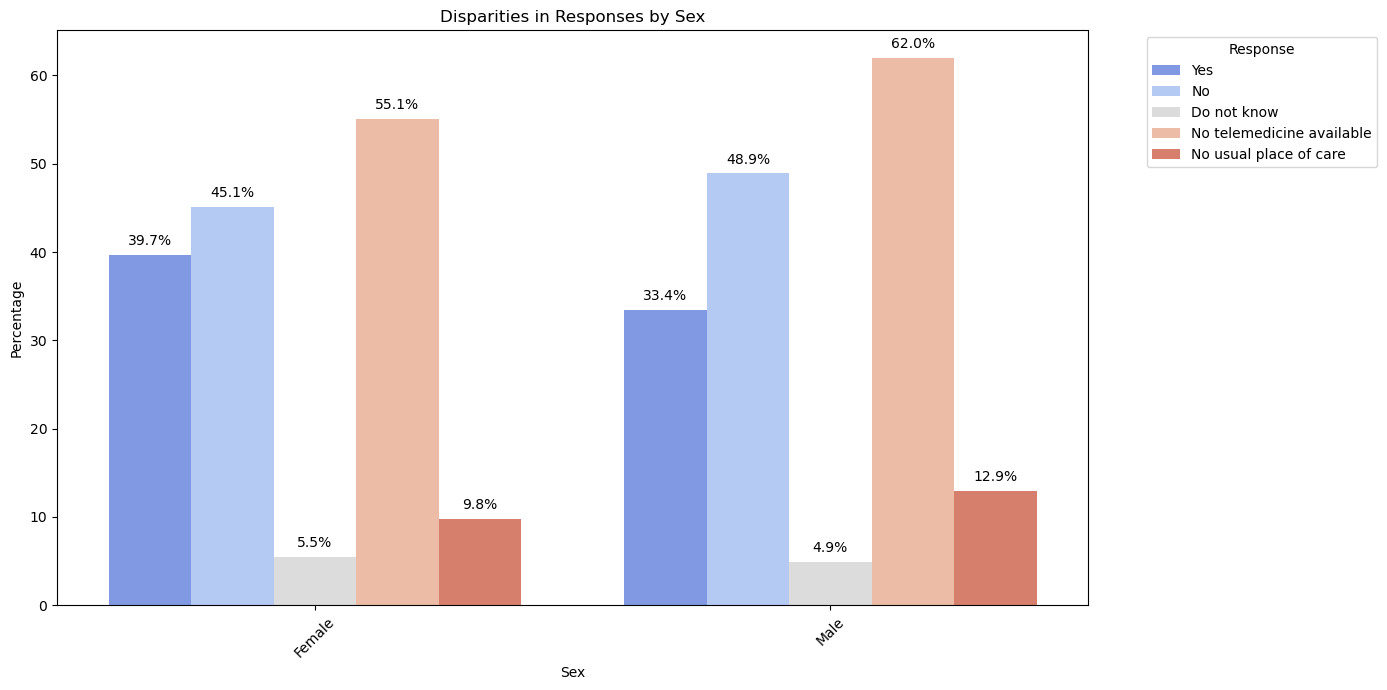

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_sex_disparities():
    # Assume df_access is a pre-defined DataFrame containing your data
    # Filter data for the 'Sex' category
    education_data = df_access[df_access['Group'] == 'Sex']
    
    # Exclude 'Total' from both the responses and subgroups if necessary
    education_data = education_data[education_data['Subgroup'] != 'Total']

    # Define the desired response order
    response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']

    # Ensure the response order in data
    education_data['Response'] = pd.Categorical(education_data['Response'], categories=response_order, ordered=True)

    # Create a pivot table
    education_pivot = education_data.pivot_table(index='Subgroup', columns='Response', values='Percent', aggfunc='first').reset_index()

    # Melt the DataFrame to long format suitable for sns.barplot
    sex_data = education_pivot.melt(id_vars='Subgroup', value_vars=response_order, var_name='Response', value_name='Percent')

    # Plotting
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=sex_data, x='Subgroup', y='Percent', hue='Response', palette='coolwarm',
                     order=sex_data['Subgroup'].unique(), hue_order=response_order,
                     edgecolor='none', linewidth=0, errcolor='none')

    plt.title('Disparities in Responses by Sex')
    plt.ylabel('Percentage')
    plt.xlabel('Sex')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Adding annotations to each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Call the function to plot disparities in sex
plot_sex_disparities()

c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


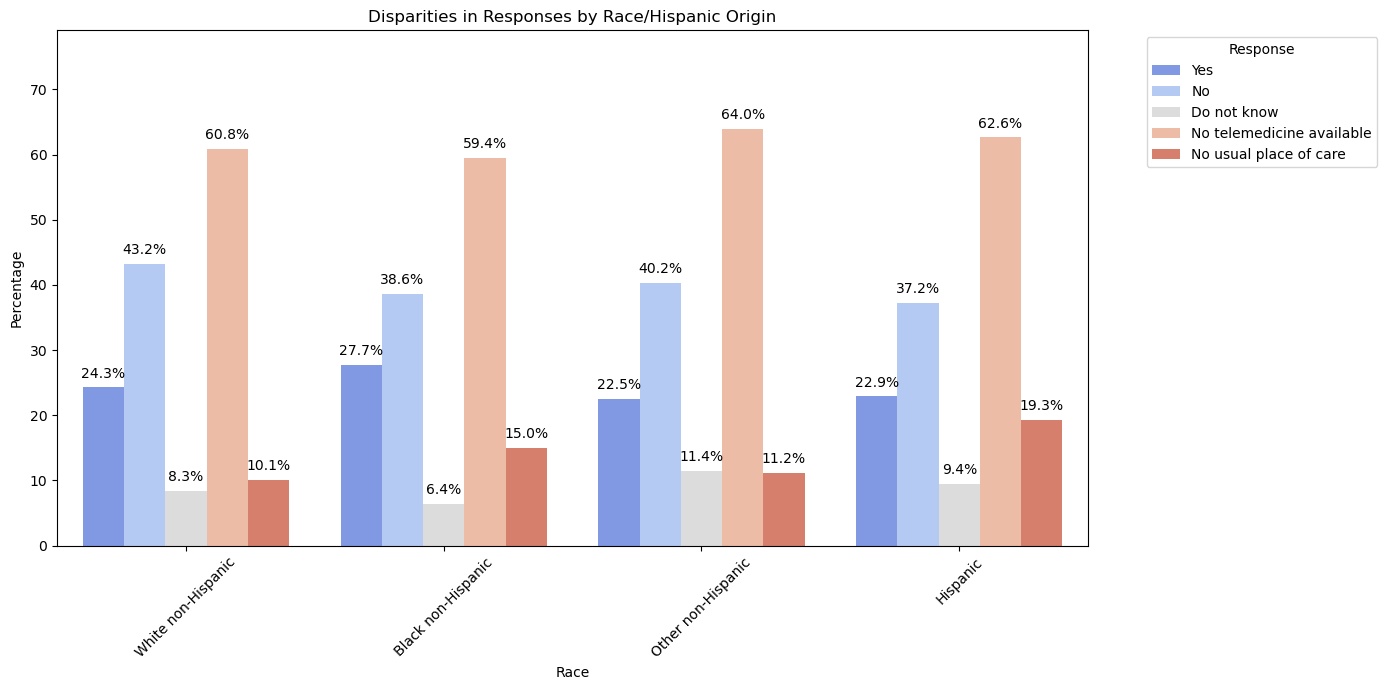

In [61]:
def plot_education_disparities():
    # Filter data for the 'Race/Hispanic origin' category
    education_data = df_access[df_access['Group'] == 'Race/Hispanic origin']
    
    # Exclude 'Total' from both the responses and subgroups if necessary
    education_data = education_data[education_data['Subgroup'] != 'Total']

    # Define the desired response order
    response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']

    # Ensure the response order in data
    education_data['Response'] = pd.Categorical(education_data['Response'], categories=response_order, ordered=True)

    # Create a pivot table
    education_pivot = education_data.pivot_table(index='Subgroup', columns='Response', values='Percent', aggfunc='first')
    
    # Plotting
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=education_data, x='Subgroup', y='Percent', hue='Response', palette='coolwarm', 
                     order=education_data['Subgroup'].unique(), hue_order=response_order,
                     edgecolor='none', linewidth=0, errcolor='none')  # Explicitly setting errcolor

    plt.title('Disparities in Responses by Race/Hispanic Origin')
    plt.ylabel('Percentage')
    plt.xlabel('Race')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Adding annotations to each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Call the function to plot disparities in education
plot_education_disparities()

c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


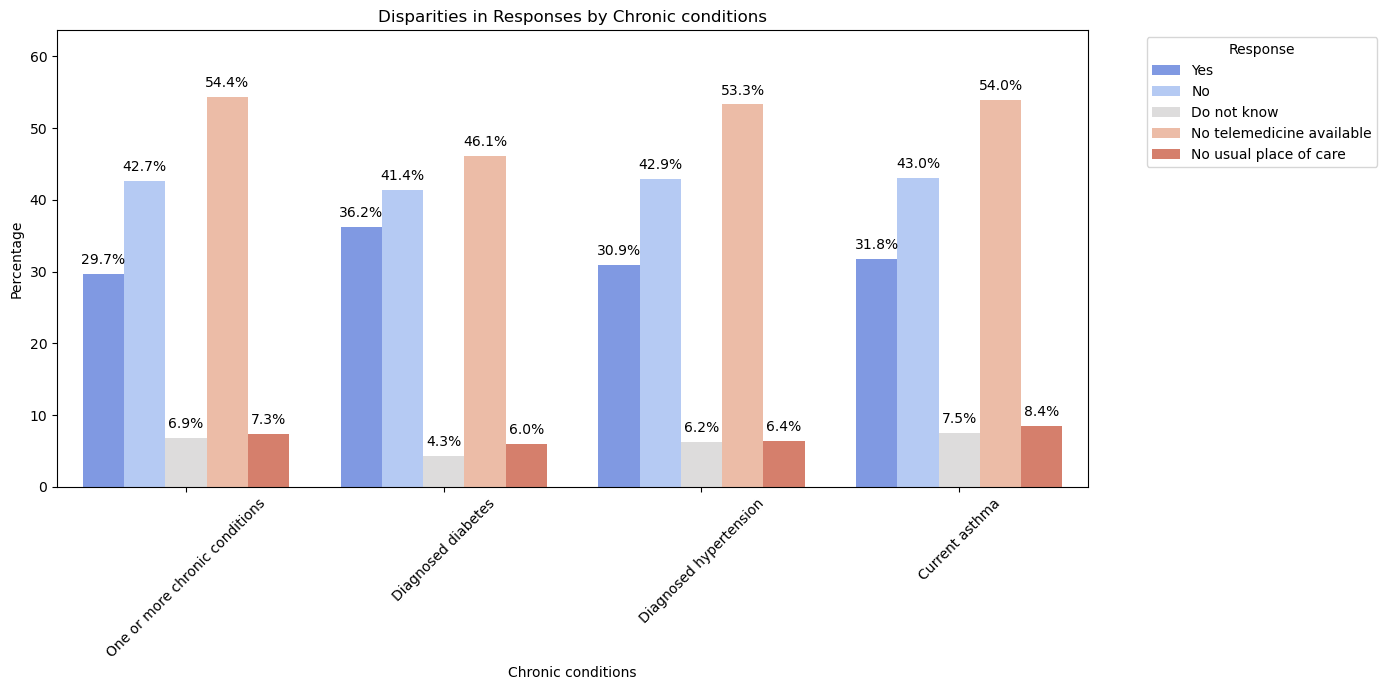

In [62]:
def plot_education_disparities():
    # Filter data for the 'Chronic conditions origin' category
    education_data = df_access[df_access['Group'] == 'Chronic conditions']
    
    # Exclude 'Total' from both the responses and subgroups if necessary
    education_data = education_data[education_data['Subgroup'] != 'Total']

    # Define the desired response order
    response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']

    # Ensure the response order in data
    education_data['Response'] = pd.Categorical(education_data['Response'], categories=response_order, ordered=True)

    # Create a pivot table
    education_pivot = education_data.pivot_table(index='Subgroup', columns='Response', values='Percent', aggfunc='first')
    
    # Plotting
    plt.figure(figsize=(14, 7))
    ax = sns.barplot(data=education_data, x='Subgroup', y='Percent', hue='Response', palette='coolwarm', 
                     order=education_data['Subgroup'].unique(), hue_order=response_order,
                     edgecolor='none', linewidth=0, errcolor='none')  # Explicitly setting errcolor

    plt.title('Disparities in Responses by Chronic conditions')
    plt.ylabel('Percentage')
    plt.xlabel('Chronic conditions')
    plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Adding annotations to each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Call the function to plot disparities in education
plot_education_disparities()

In [63]:
df_tele_qtr_yr_age

,Indicator,Group,State,Age,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter,Year
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,2021
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,2021
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,2021
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,2021
5,Adults Who Had Appointment with Health Profess...,By Age,National,60 - 69 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,27.6,25.9,29.4,25.9 - 29.4,NaN,NaN,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,21.6,20.0,23.4,20.0 - 23.4,NaN,NaN,3,2022
3196,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,24.4,22.5,26.4,22.5 - 26.4,NaN,NaN,3,2022
3197,Adults Who Had Appointment with Health Profess...,By Age,National,60 - 69 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,23.4,21.8,25.0,21.8 - 25.0,NaN,NaN,3,2022
3198,Adults Who Had Appointment with Health Profess...,By Age,National,70 - 79 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,28.8,26.6,31.0,26.6 - 31.0,NaN,NaN,3,2022


In [64]:
filtered_qtr_age_tmed_dy21

,Time_Frame,TM_Srvc_Type,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,TM_Bene_Cnt,Tot_Bene_Cnt,TM_Bene_Pct
0,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,Aged,All,All,26682.0,331535.0,0.080480
1,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,65-74,All,14398.0,177040.0,0.081326
2,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,75-84,All,9391.0,116905.0,0.080330
3,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,85 and over,All,3255.0,42856.0,0.075952
4,Pandemic (March 2020-February 2021),All Telemedicine,2020,1,Alabama,All,All,All,All,All,All,36027.0,428008.0,0.084174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15727,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,1712.0,29613035.0,0.000058
15728,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,1822.0,27232089.0,0.000067
15729,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2019,4,National,All,All,All,All,All,All,2080.0,27051200.0,0.000077
15730,Pre-Pandemic (March 2019 - February 2020),Virtual Check-In,2020,1,National,All,All,All,All,All,All,1936.0,22684003.0,0.000085


In [65]:
filtered_qtr_age_tmed_dy21['State'].value_counts().get

<bound method NDFrame.get of State
National                1622
Montana                  252
Nebraska                 252
Nevada                   252
New Hampshire            252
New Jersey               252
New Mexico               252
New York                 252
North Carolina           252
North Dakota             252
Ohio                     252
Oklahoma                 252
Oregon                   252
Pennsylvania             252
Rhode Island             252
South Carolina           252
South Dakota             252
Tennessee                252
Texas                    252
Utah                     252
Vermont                  252
Virginia                 252
Washington               252
West Virginia            252
Wisconsin                252
Alaska                   252
Alabama                  252
Missouri                 252
Mississippi              252
Arizona                  252
Arkansas                 252
California               252
Colorado                 252
Connecti

In [66]:
filtered_qtr_age_tmed_dy21['Age'].value_counts().get

<bound method NDFrame.get of Age
All             11642
65-74             720
75-84             720
85 and over       720
Less than 65      720
Name: count, dtype: int64>

In [67]:
filtered_qtr_age_tmed_dy21['Bene_Race_Desc'].value_counts().get

<bound method NDFrame.get of Bene_Race_Desc
All                                9770
American Indian / Alaska Native     792
Asian                               792
Black/African American              792
Hispanic                            792
Other/Unknown                       792
White                               792
Name: count, dtype: int64>

In [68]:
filtered_qtr_age_tmed_dy21['Bene_Sex_Desc'].value_counts().get

<bound method NDFrame.get of Bene_Sex_Desc
All       13082
Female      720
Male        720
Name: count, dtype: int64>

In [69]:
filtered_qtr_age_tmed_dy21['Quarter'].value_counts().get

<bound method NDFrame.get of Quarter
1    3632
2    3630
3    3630
4    3630
Name: count, dtype: int64>

In [70]:
filtered_qtr_age_tmed_dy21['Year'].value_counts().get

<bound method NDFrame.get of Year
2020    12078
2021     2414
2019       30
Name: count, dtype: int64>

In [71]:
filtered_qtr_age_tmed_dy21['TM_Srvc_Type'].value_counts().get

<bound method NDFrame.get of TM_Srvc_Type
All Telemedicine    14460
Telehealth             24
Virtual Check-In       24
E-Visit                14
Name: count, dtype: int64>

C:\Users\RobertRodrigues\AppData\Local\Temp\ipykernel_3564\2529364223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_qtr_age_tmed_dy21["Year_Quarter"] = filtered_qtr_age_tmed_dy21['Year'].astype(str) + ' Q' + filtered_qtr_age_tmed_dy21['Quarter'].astype(str)


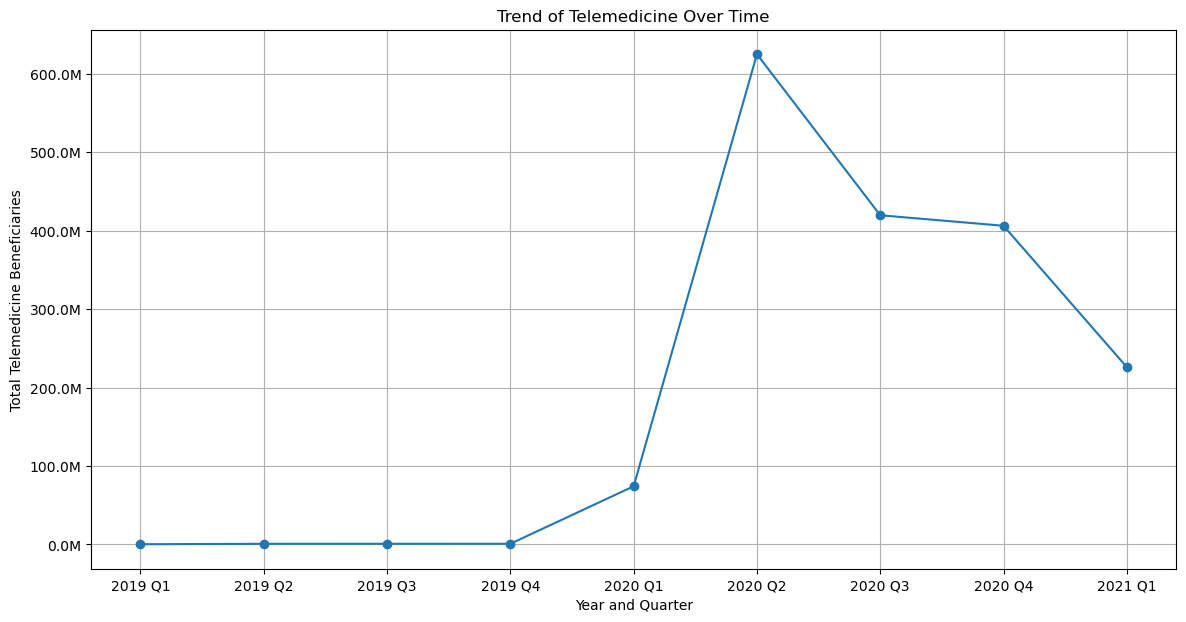

In [72]:
filtered_qtr_age_tmed_dy21["Year_Quarter"] = filtered_qtr_age_tmed_dy21['Year'].astype(str) + ' Q' + filtered_qtr_age_tmed_dy21['Quarter'].astype(str)

telemedicine_trend = filtered_qtr_age_tmed_dy21.groupby('Year_Quarter')['TM_Bene_Cnt'].sum()

fig, ax = plt.subplots(figsize=(14,7))
telemedicine_trend.plot(kind="line", marker='o', ax=ax)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))

plt.title('Trend of Telemedicine Over Time')
plt.ylabel('Total Telemedicine Beneficiaries')
plt.xlabel('Year and Quarter')
plt.grid('True')
plt.show()

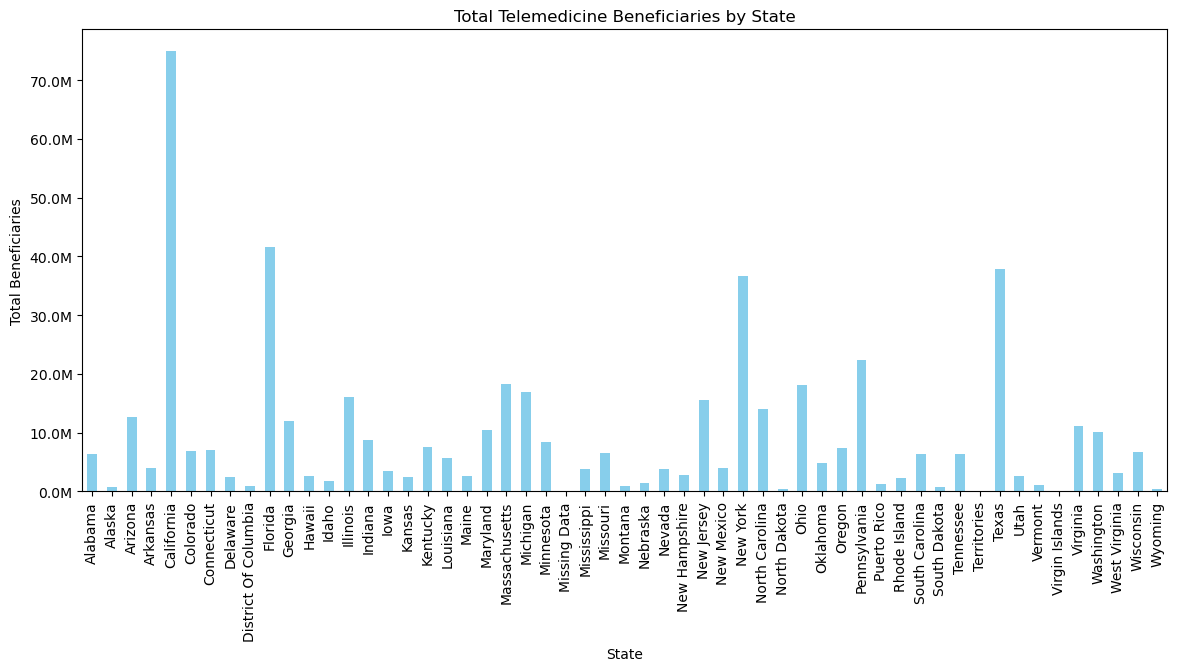

In [112]:

total_by_state = filtered_qtr_age_tmed_dy21.groupby('State')['TM_Bene_Cnt'].sum()

# Remove the 'National' bar
total_by_state = total_by_state.drop('National', errors='ignore')

# Plot the data without 'National'
ax = total_by_state.plot(kind='bar', figsize=(14, 6), color='skyblue')
plt.title('Total Telemedicine Beneficiaries by State')
plt.xlabel('State')
plt.ylabel('Total Beneficiaries')
plt.xticks(rotation=90)  # Rotate state labels for better visibility

# Format the y-axis to show numbers as millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M'))

plt.show()


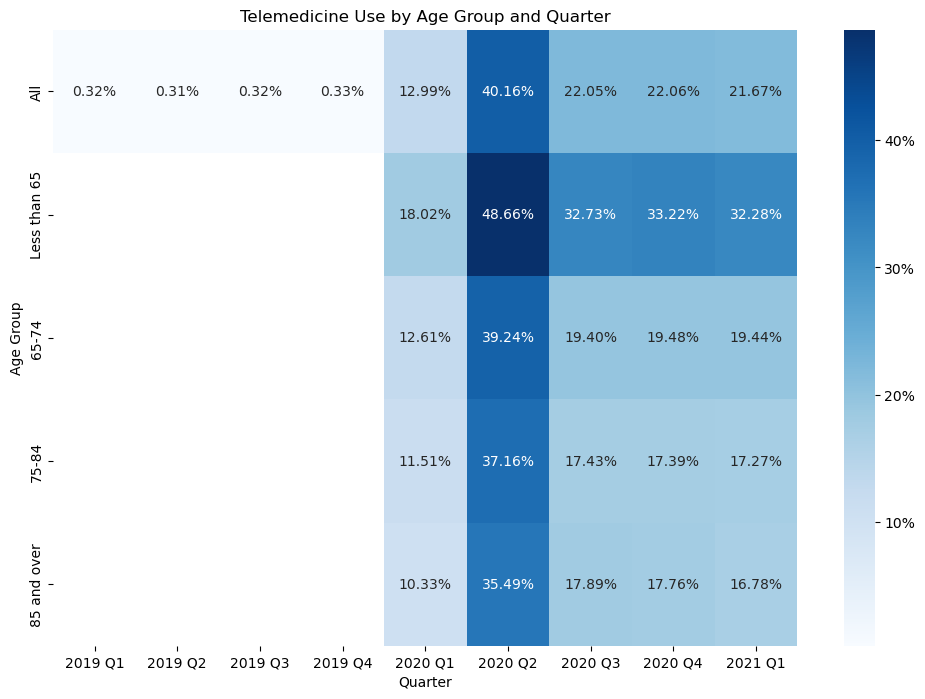

In [113]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap='Blues')
plt.title('Telemedicine Use by Age Group and Quarter')
plt.xlabel('Quarter')
plt.ylabel('Age Group')

# Adjust the color bar to display whole number percentages
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x*100:.0f}%'))

plt.show()


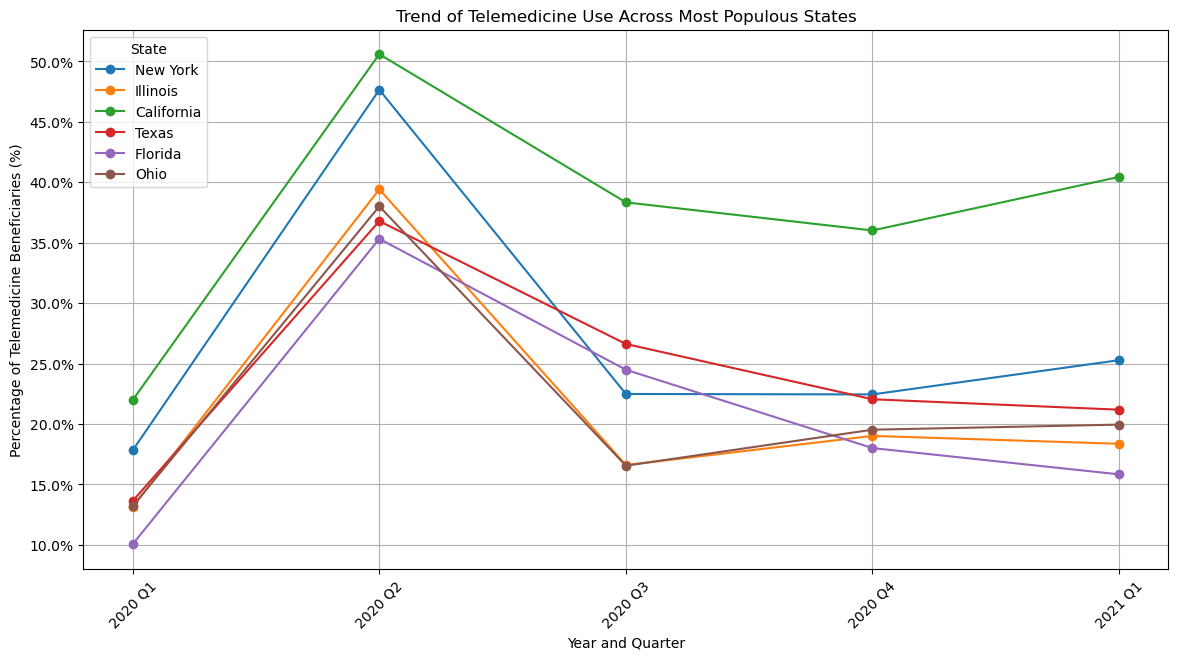

In [122]:
# Example states
states_of_interest = ['New York', 'Illinois', 'California', 'Texas', 'Florida', 'Ohio']  # Example

# Grouping data
grouped_data = filtered_qtr_age_tmed_dy21.groupby(['State', 'Year_Quarter'])[['TM_Bene_Cnt', 'Tot_Bene_Cnt']].sum().reset_index()
grouped_data['TM_Bene_Pct'] = grouped_data['TM_Bene_Cnt'] / grouped_data['Tot_Bene_Cnt']

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
legends_added = False

for state in states_of_interest:
    state_data = grouped_data[grouped_data['State'] == state]
    if not state_data.empty:
        ax.plot(state_data['Year_Quarter'], state_data['TM_Bene_Pct'], marker='o', label=state)
        legends_added = True

if legends_added:
    ax.legend(title='State')
else:
    print("No data available for any of the specified states.")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{100 * y:.1f}%'))
ax.set_title('Trend of Telemedicine Use Across Most Populous States')
ax.set_xlabel('Year and Quarter')
ax.set_ylabel('Percentage of Telemedicine Beneficiaries (%)')
plt.xticks(rotation=45)
ax.grid(True)
plt.show()



In [123]:
categories = ['Year', 'Quarter', 'State', 'Sex', 'Age', 'Bene_Race_Desc', 'Bene_Sex_Desc']

# Define a default response order
#default_response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']

def plot_data_for_category(category):
    # Filter data for the category
    category_data = df_access[df_access['Group'] == category]
    
    if 'Indicator' in category_data.columns:
        indicator = category_data['Indicator'].iloc[0]
    else:
        indicator = "No Indicator Available"

    # Create a pivot table
    category_pivot = category_data.pivot_table(index='Response', columns='Subgroup', values='Percent', aggfunc='first')
    
    # Remove 'Total' from the DataFrame if it exists
    category_pivot = category_pivot.drop('Total', errors='ignore')
    
    # Reindex the pivot table according to the specified order.
    if category == 'Chronic conditions':
        response_order = ['Yes', 'No', 'Do not know', 'No telemedicine available', 'No usual place of care']
    else:
        response_order = default_response_order
    category_pivot = category_pivot.reindex(response_order)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.heatmap(category_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
    plt.title(f'Response Distribution by {category} - {indicator}')
    plt.ylabel('Response Type')
    plt.xlabel('Subgroup')
    plt.show()

# Generate plots for each category
for category in categories:
    plot_data_for_category(category)

IndexError: single positional indexer is out-of-bounds

In [ ]:
filtered_qtr_age_tmedtrend

,Year,Quarter,State,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Age,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth,Year
1270,2020,1,National,All,All,All,All,0-64,All,3163071.0,4.301853e+06,365839.0,0.1157,2020
1271,2020,1,National,Medicare & Medicaid,All,All,All,0-64,All,2012704.0,2.571352e+06,251094.0,0.1248,2020
1272,2020,1,National,Medicare Only,All,All,All,0-64,All,1150367.0,1.730500e+06,114745.0,0.0997,2020
1273,2020,1,National,All,American Indian/Alaska Native,All,All,0-64,All,37085.0,4.961333e+04,3493.0,0.0942,2020
1274,2020,1,National,All,Asian/Pacific Islander,All,All,0-64,All,58292.0,8.433633e+04,6026.0,0.1034,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21496,2023,3,Wisconsin,All,All,All,All,85 and over,All,41593.0,5.168267e+04,2529.0,0.0608,2023
21513,2023,3,Wyoming,All,All,All,All,0-64,All,5754.0,8.414667e+03,959.0,0.1667,2023
21514,2023,3,Wyoming,All,All,All,All,65-74,All,33249.0,5.183133e+04,1750.0,0.0526,2023
21515,2023,3,Wyoming,All,All,All,All,75-84,All,21050.0,2.849067e+04,1042.0,0.0495,2023
